# Tutorial 10: Indexing, Slicing and Masking

## PHYS 2600, Spring 2019

In [9]:
## Commonly-used import cell

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## T10.1 - Indexing, slicing, and masking

Let's begin with some simple practice in indexing.  First, __run the cell below__ to load a few arrays into the global namespace.  (If you make any mistakes below, you can always re-run this cell to re-initialize the arrays.)

In [10]:
planets = np.array(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'n/a'])
powers_of_two = np.array([1,   2,   4,   8,  16,  32,  64, 128, 256, 512])
some_data = np.array([ 4.00, 1.72, -0.22, 1.80, -3.61, -0.90, -3.29, 4.45, 3.29, 2.26])
also_planets = planets

Now, use index notation to accomplish the following:

* Get and print the name of the sixth planet, Saturn, from `planets`.
* Set the last entry of `planets` to `'Pluto'` (then print `planets` again.)

In [11]:
print(planets[5])
planets[-1] = 'Pluto'
print(planets)

Saturn
['Mercury' 'Venus' 'Earth' 'Mars' 'Jupiter' 'Saturn' 'Uranus' 'Neptune'
 'Pluto']


When you assigned to `planets` above, you changed the array __in-place__, which means you actually modified the block of memory allocated when we made `planets`.  That means that any name which points to the _same array_ will see the changes you made.

__Print out the array `also_planets`__ and verify that it shows the addition of Pluto as well.

In [12]:
also_planets

array(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus',
       'Neptune', 'Pluto'], dtype='<U7')

Use _slice_ notation `a[i:j:k]` to accomplish the following:

* Get and print the names of the _inner_ planets, i.e. everything closer to the Sun than Jupiter, from `planets`.
* Get and print all _even_ powers of 2, i.e. $2^0, 2^2, 2^4...$, which appear in `powers_of_two`.
* Divide the last three entries in `some_data` by 5 (then print `some_data` to verify.)

In [13]:
print(planets[:4])
print(powers_of_two[::2])
some_data[-3:] /= 5
print(some_data)

['Mercury' 'Venus' 'Earth' 'Mars']
[  1   4  16  64 256]
[ 4.     1.72  -0.22   1.8   -3.61  -0.9   -3.29   0.89   0.658  0.452]


Finally, use _mask_ notation to accomplish the following:

* Get and print all of the negative entries in `some_data`.
* Square all of the entries in `powers_of_two` which are greater than 100 (then print `powers_of_two`.)

In [14]:
print(some_data[some_data < 0])
powers_of_two[powers_of_two > 100] **= 2
print(powers_of_two)

[-0.22 -3.61 -0.9  -3.29]
[     1      2      4      8     16     32     64  16384  65536 262144]


## T10.2 - Changing arrays

In the above examples, we made modifications to our arrays _in place_.  Now let's investigate some of the NumPy operations that create _new_ arrays as a result.  As always, use the NumPy documentation and/or the `?` magic command if you're not sure exactly how to use a function.

### Part A

The array `a` below contains a list of even numbers from 0 to 16.  Use `np.insert()` to make a new array with the number 9 added to it (in numerical order.)

In [15]:
a = np.arange(0,17,2)

### BEGIN SOLUTION
b = np.insert(a, 5, 9)
print(b)
### END SOLUTION


[ 0  2  4  6  8  9 10 12 14 16]


### Part B

Use `np.append` to create a single array  that __counts from 0-60 (including both ends__) as follows:

* Every number from 0 to 10, then
* Every _other_ number from 10 to 30 (so `[10,12,14...]`), and finally
* Every _third_ number from 30 to 60 (so `[30,33,36...,60]`).

As a quick check, your final array should have length 31.

In [16]:
count_a = np.arange(0,10)
count_b = np.arange(10,30,2)
count_c = np.arange(30,61,3) # Adjust top end to include 60!

count = np.append(count_a, count_b)
count = np.append(count, count_c)
print(len(count))
count

31


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 16, 18, 20, 22,
       24, 26, 28, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60])

## T10.3 - Using masks

Masks are one of the most powerful tools we have for manipulating parts of a NumPy array, beyond the simple examples we saw above.  Let's get more comfortable with using masks, and then see a couple of applications.

### Part A

Let's begin with the example from lecture:

<img src="https://physicscourses.colorado.edu/phys2600/phys2600_sp19/img/mask.png" width=400px />

In [18]:
a = np.array([17,-3,-44,8,56])
pos_mask = a > 0
print(pos_mask)
print(a[pos_mask])

[ True False False  True  True]
[17  8 56]


As we saw in lecture, we can use the mask __in reverse__, to assign to a sub-array of `a`.  In the cell below, __use `pos_mask` to multiply all of the positive entries in `a` by -1__, so that the array becomes entirely negative.

In [19]:
a[pos_mask] *= -1
print(a)

[-17  -3 -44  -8 -56]


When we use a comparison operator like `a > 0`, we _create a new array_ to be a mask.  That means that `pos_mask` doesn't change automatically if we change `a` - __run the cell below__ to verify that `pos_mask` is unchanged.  (Of course, we can always run a new comparison `a > 0` to get an updated mask.)

In [20]:
print(a)
print(pos_mask)
print(a > 0)

[-17  -3 -44  -8 -56]
[ True False False  True  True]
[False False False False False]


### Part B

As with single Boolean values, there are many situations where applying logical operations to combine or negate a mask is very useful.  Let's run through some examples: first __run the next cell__ to create an array and some masks.

In [28]:
b = np.arange(21)
div_2_mask = b % 2 == 0
div_3_mask = b % 3 == 0
div_5_mask = b % 5 == 0
print(b)
print(b[div_2_mask])
print(b[div_3_mask])
print(b[div_5_mask])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  2  4  6  8 10 12 14 16 18 20]
[ 0  3  6  9 12 15 18]
[ 0  5 10 15 20]


Our masks here are using the modulo operator to single out numbers in `b` that are divisible by 2, 3, or 5.  Thus, for example, `b[div_2_mask]` gives us all the even numbers.  

But what if we want all the _odd_ numbers in `b` instead?  We could make a new mask like `b % 2 != 0`, but we don't need to, since `div_2_mask` already has the information we want if we apply the logical operation `not` to it.

Unfortunately, we can't use the keyword `not`, as you'll see from running the cell below:

In [29]:
not div_2_mask

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This is the error you'll see if you try to use any of `and`, `or`, or `not` on an array: these operators only work on single Boolean values, not arrays!  Instead, we must use the NumPy equivalent functions.  __Run the next cell__ to see simple examples of each NumPy logical operation.

In [30]:
bool_A = np.array([True, True, False])
bool_B = np.array([False, True, True])

print(np.logical_not(bool_A))
print(np.logical_or(bool_A, bool_B))
print(np.logical_and(bool_A, bool_B))

# Shorthand with "bit logic" operators
print(~bool_A)
print(bool_A | bool_B)
print(bool_A & bool_B)

[False False  True]
[ True  True  True]
[False  True False]
[False False  True]
[ True  True  True]
[False  True False]


The operators `~`, `|` and `&` are __bit operations__, that act on the underlying binary data of a Python object directly.  For most purposes you should avoid these operators, but since a Boolean object is a single bit, they just act like shorthand for the logical operations `not`, `or`, `and`.  

You can use them interchangeably, but __be careful with the bit-wise operators__, because they will work on _non-Boolean_ objects too - and the results will be pretty weird!

Back to our example: use the `not` operation and `div_2_mask` to __select all of the odd entries in `b`__.

In [31]:
b[np.logical_not(div_2_mask)]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

Now use the `and` operation with the masks we defined to __select all of the multiples of 6 in `b`__.

In [32]:
b[np.logical_and(div_2_mask, div_3_mask)]

array([ 0,  6, 12, 18])

Finally, let's try assigning through the mask: use the `or` operation to __set every entry of `b` which is not a multiple of 2, 3, or 5 to zero.__

In [33]:
div_235_mask = np.logical_not(np.logical_or(div_2_mask, np.logical_or(div_3_mask, div_5_mask)))
b[div_235_mask] = 0

print(b)

[ 0  0  2  3  4  5  6  0  8  9 10  0 12  0 14 15 16  0 18  0 20]


### Part C

Now let's actually do something useful with masks! Implement the __square wave pulse__ function `square_wave(x)` below, which is defined by

\\[
w(x) = \begin{cases} 1, -1 \leq x \leq 1; \\ 0,\ \rm{otherwise}. \end{cases}
\\]

_(Hint: the_ `np.zeros_like()` or `np.ones_like()` _functions would be a useful starting point for making the array `w` that your function should return.  Then you just need to apply a mask to set some of the zeros to 1 (or vice-versa.)_

__Important note:__ make sure you make a _new_ array for the result of the function `w(x)`, and don't overwrite anything in `x` itself!  Changing `x` would be an example of a __side effect__, which is when a function does something _other_ than just returning a new object.  If you're trying to plot `w(x)`, you don't want to change the `x` array that you're given!

In [34]:
def square_wave(x):
    ### BEGIN SOLUTION

    ## This fails because it translates to (-1 <= x) and (x <= 1),
    ## but regular `and` doesn't recognize NumPy arrays!
#    wave_mask = -1 <= x <= 1
    ## We need the numpy version:
    wave_mask = np.logical_and(-1 <= x, x <= 1)
    
    w = np.zeros_like(x, np.float64)
    w[wave_mask] = 1.
    
    ## We don't need to do this, because those entries are already zero!
#    w[~wave_mask] = 0.  
    
    return w
    ### END SOLUTION
    
    

In [35]:
import numpy.testing as npt

x = np.arange(-5,5)
npt.assert_allclose(square_wave(x), [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])
npt.assert_allclose(x, np.arange(-5,5))  # Make sure x didn't change!

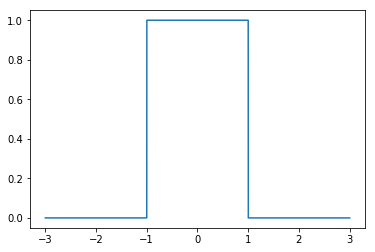

In [36]:
# Test plot: should look like a square pulse from -1 to 1

x = np.linspace(-3,3,100000)
w = square_wave(x)
plt.plot(x,w)